In [1]:
import quandl # for stock data
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = quandl.get("EOD/V",api_key="FBC-Lq9A7Tt4Ners7dxJ",start_date="2015-08-20",end_date="2018-01-11",columns = ['date', 'adj_close'] ) # getting stock data

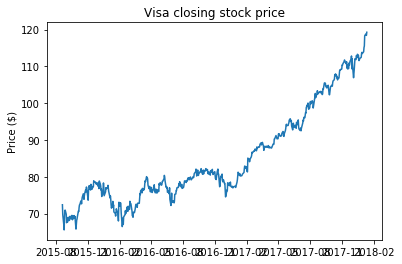

In [3]:
#plotting train data
plt.plot(data.index,data['Adj_Close'])
plt.title('Visa closing stock price')
plt.ylabel('Price ($)')
plt.show()

In [4]:
from pandas.stats.moments import ewma # for removing outliers
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2015-08-20,73.56,74.53,72.81,73.95,12082313.0,0.0,1.0,72.020340,72.970038,71.286038,72.402178,12082313.0
2015-08-21,72.50,73.62,70.96,71.19,15751191.0,0.0,1.0,70.982527,72.079085,69.474760,69.699946,15751191.0
2015-08-24,64.16,71.06,60.00,68.36,20949581.0,0.0,1.0,62.817089,69.572667,58.744160,66.929180,20949581.0
2015-08-25,71.69,71.80,66.60,66.97,14483302.0,0.0,1.0,70.189481,70.297178,65.206018,65.568274,14483302.0
2015-08-26,69.37,70.99,67.90,70.69,12188142.0,0.0,1.0,67.918040,69.504132,66.478808,69.210411,12188142.0


In [5]:
smoothed_data = data.ewm(span=30).mean() # taking lags or previous periods for avg as 30
smoothed_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2015-08-20,73.560000,74.530000,72.810000,73.950000,1.208231e+07,0.0,1.0,72.020340,72.970038,71.286038,72.402178,1.208231e+07
2015-08-21,73.012333,74.059833,71.854167,72.524000,1.397790e+07,0.0,1.0,71.484137,72.509712,70.350211,71.006025,1.397790e+07
2015-08-24,69.862725,72.992510,67.636524,71.042473,1.645838e+07,0.0,1.0,68.400452,71.464729,66.220846,69.555507,1.645838e+07
2015-08-25,70.366206,72.663930,67.350924,69.920358,1.591418e+07,0.0,1.0,68.893395,71.143026,65.941224,68.456879,1.591418e+07
2015-08-26,70.139545,72.283071,67.475852,70.095470,1.506641e+07,0.0,1.0,68.671478,70.770138,66.063537,68.628326,1.506641e+07


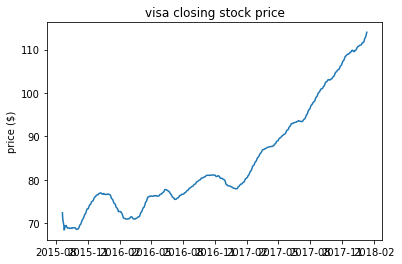

In [6]:
plt.plot(smoothed_data.index,smoothed_data['Adj_Close'])
plt.title('visa closing stock price')
plt.ylabel('price ($)')
plt.show()

In [7]:
test = quandl.get("EOD/V",api_key="FBC-Lq9A7Tt4Ners7dxJ",start_date="2018-01-12",end_date="2018-08-21") #getting test data

smoothed_data=smoothed_data.reset_index(level=0) # modiving data as column

smoothed_data=smoothed_data[['Date','Adj_Close']]
smoothed_data=smoothed_data.rename(index=str,columns={"Date":"ds","Adj_Close":"y"}) # modifing the columns according to the model takes

In [8]:
import fbprophet # faceook prophet
smoothed_data.head()

,ds,y
0,2015-08-20,72.402178
1,2015-08-21,71.006025
2,2015-08-24,69.555507
3,2015-08-25,68.456879
4,2015-08-26,68.628326


In [9]:
stock_model = fbprophet.Prophet(seasonality_mode='multiplicative',daily_seasonality=True) # creating model

In [10]:
stock_model.fit(smoothed_data) # fitting model

In [11]:
stock_forecast = stock_model.make_future_dataframe(periods=len(test),freq='D') # making future data frame
forecast = stock_model.predict(stock_forecast) # predicting

In [12]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2015-08-20,17.730065,17.730065,17.730065,69.797653,70.405581,0.0,0.0,0.0,2.803696,...,2.954265,2.954265,2.954265,0.141867,0.141867,0.141867,0.008701,0.008701,0.008701,70.109373
1,2015-08-21,17.717558,17.717558,17.717558,69.741636,70.349561,0.0,0.0,0.0,2.803696,...,2.953745,2.953745,2.953745,0.142444,0.142444,0.142444,0.007604,0.007604,0.007604,70.050714
2,2015-08-24,17.680039,17.680039,17.680039,69.476163,70.075281,0.0,0.0,0.0,2.803696,...,2.946891,2.946891,2.946891,0.138389,0.138389,0.138389,0.004806,0.004806,0.004806,69.781178
3,2015-08-25,17.667532,17.667532,17.667532,69.411643,70.016253,0.0,0.0,0.0,2.803696,...,2.946136,2.946136,2.946136,0.138364,0.138364,0.138364,0.004076,0.004076,0.004076,69.718488
4,2015-08-26,17.655026,17.655026,17.655026,69.362570,69.998042,0.0,0.0,0.0,2.803696,...,2.947015,2.947015,2.947015,0.139860,0.139860,0.139860,0.003458,0.003458,0.003458,69.684643


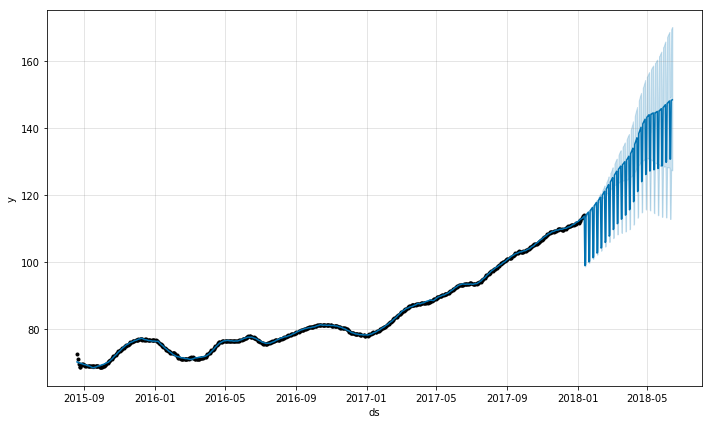

In [13]:
plot_prediction=stock_model.plot(forecast) # plotiing prediction
plot_prediction

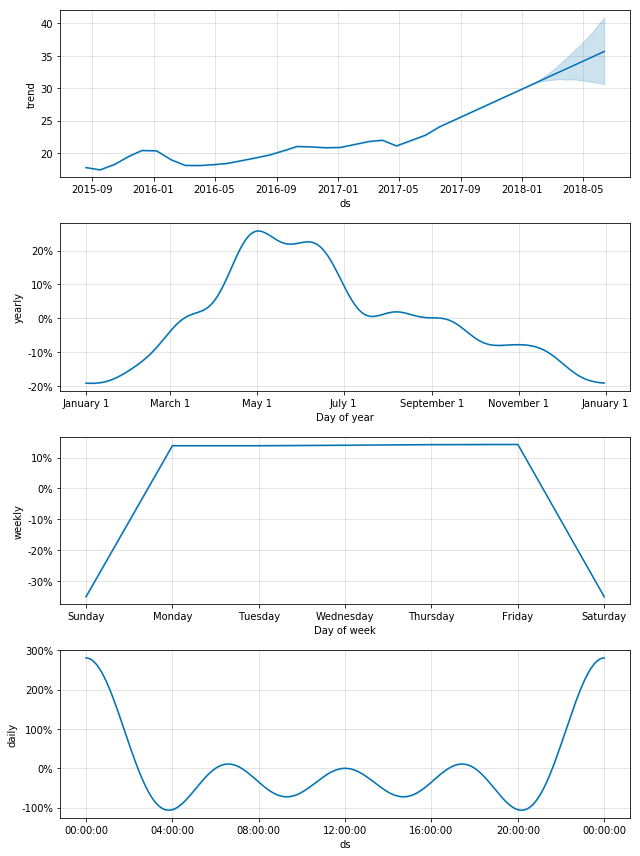

In [14]:
ploting_predcition_components=stock_model.plot_components(forecast)
ploting_predcition_components # plotting components of the model

In [15]:
from sklearn.metrics import mean_squared_error # modules to evaluate
from math import sqrt

In [16]:
sqrt(mean_squared_error(test['Adj_Close'],forecast.tail(len(test))['yhat'])) # test set error


9.264156008891835

In [17]:
sqrt(mean_squared_error(data['Adj_Close'],forecast.head(len(data))['yhat'])) # train set error

2.200770709696132